In [1]:
## IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.metrics import SparseCategoricalCrossentropy
from keras.regularizers import l2
from keras.optimizers import Adam, RMSprop

In [2]:
## LOADING THE IMAGE DATA FROM THE KERAS LIBRARY
(train_images, train_labels), (test_images,test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
## NORMALIZATION OF THE PIXEL CONTENTS TO BE BETWEEN 0 AND 1
train_images = train_images/255.0
test_images = test_images/255.0

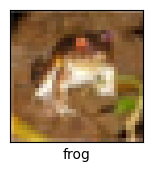

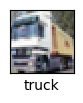

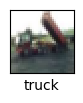

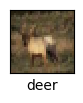

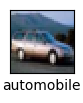

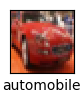

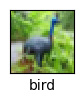

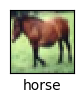

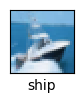

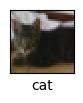

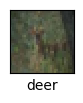

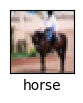

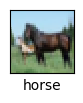

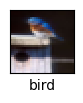

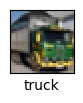

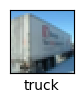

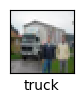

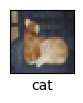

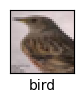

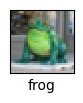

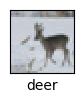

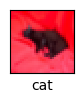

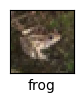

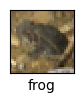

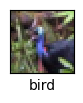

In [4]:
## VERIFYING THE DATASET PLOTTING THE FIRST 25 IMAGES FROM TRAINING SET AND DISPLAY THE CLASS NAME BELOW EACH IMAGE
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])

  plt.xlabel(class_names[train_labels[i][0]])
  plt.show()

In [5]:
## BUILDING THE MODEL AND THE ARCHITECTURE OF THE CNN
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
## COMPILATION OF THE MODEL
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
## FITTING THE MODEL
model_history = model.fit(train_images, train_labels, epochs = 16, validation_data = (test_images, test_labels))

Epoch 1/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.2621 - loss: 1.9978 - val_accuracy: 0.4218 - val_loss: 1.6143
Epoch 2/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.4500 - loss: 1.5104 - val_accuracy: 0.4986 - val_loss: 1.3906
Epoch 3/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.5004 - loss: 1.3935 - val_accuracy: 0.5188 - val_loss: 1.3290
Epoch 4/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.5376 - loss: 1.3056 - val_accuracy: 0.5414 - val_loss: 1.2918
Epoch 5/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.5573 - loss: 1.2561 - val_accuracy: 0.5714 - val_loss: 1.2111
Epoch 6/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.5789 - loss: 1.1939 - val_accuracy: 0.5765 - val_loss: 1.1861
Epoch 7/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5967 - loss: 1.1535 - val_accuracy: 0.5799 - val_loss: 1.1808
Epoch 8/16
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6053 -

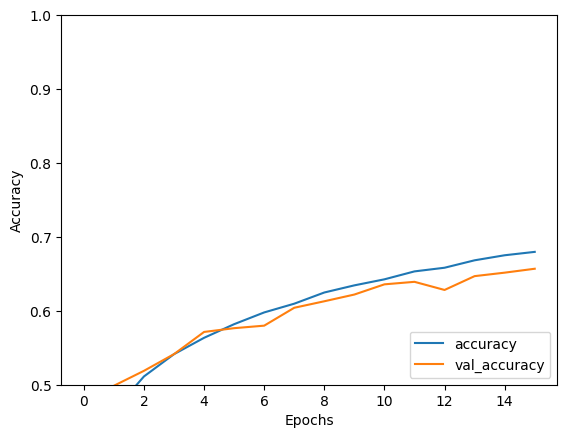

In [8]:
## EVALUATING THE MODEL PERFORMANCE
plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print(test_accuracy)

313/313 - 6s - 18ms/step - accuracy: 0.6569 - loss: 0.9879
0.6568999886512756
